In [64]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [65]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [66]:
import pandas as pd

message = pd.read_csv('../Data/SMSSpamCollection.txt',names=['label','message'],sep='\t')

In [67]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


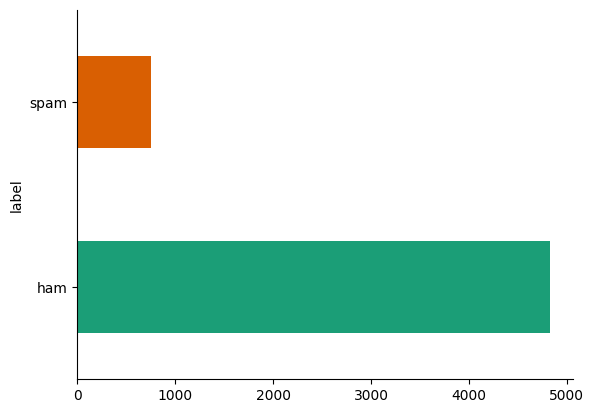

In [68]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
message.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
message['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [70]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [71]:
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/arjun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
corpus = []
for i in range(len(message)):
  review = re.sub('[^A-Za-z]',' ',message['message'][i])
  review = review.lower()
  review = review.split()
  words = [lemmatizer.lemmatize(word) for word in review]
  words = ' '.join(words)
  corpus.append(words)

In [73]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [74]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arjun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [77]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [78]:
from tqdm import tqdm

In [79]:
word2vec_model = Word2Vec(words)

In [80]:
word2vec_model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'day',
 'ok',
 'what',
 'free',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'time',
 'good',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'text',
 'love',
 'only',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'our',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'they',
 'later',
 'please',
 'her',
 'pls',
 'ha',
 'any',
 'co',
 'did',
 'been',
 'msg',
 'min',
 'an',
 'some',
 'make',
 'night',
 'dear',
 'who',
 'here',
 'message',
 'well',
 'say',
 'where',
 're',
 'thing',
 'much',
 'grea

In [81]:
word2vec_model.corpus_count

5569

In [82]:
word2vec_model.epochs

5

In [83]:
word2vec_model.wv.similar_by_word('happy')

[('day', 0.9991531372070312),
 ('my', 0.9988880157470703),
 ('wish', 0.9987327456474304),
 ('great', 0.9987155199050903),
 ('well', 0.9986912608146667),
 ('dear', 0.998685896396637),
 ('nice', 0.998606264591217),
 ('amp', 0.9985767602920532),
 ('hope', 0.9984934329986572),
 ('good', 0.9984629154205322)]

In [84]:
# def avg_word2vec(doc):
#   return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key])

# X = []
# for i in tqdm(range(len(words))):
#   X.append(avg_word2vec(words[i]))


In [85]:
import numpy as np

In [86]:
def avg_word2vec(doc):
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Generate the list of average word2vec vectors for each document
X = [avg_word2vec(doc) for doc in tqdm(words)]

100%|██████████| 5569/5569 [00:01<00:00, 4915.56it/s]


Independant features

In [87]:
X

[array([-0.1909047 ,  0.21009384,  0.11761991,  0.06429563,  0.18976071,
        -0.43291506,  0.10651477,  0.5661571 , -0.29455033, -0.04595846,
        -0.15429333, -0.41564602,  0.00858488,  0.14076552,  0.21926741,
        -0.14274307,  0.01361085, -0.23982133, -0.03293396, -0.4938533 ,
         0.1873519 ,  0.10013164,  0.18165128, -0.19412524, -0.02136017,
         0.14128806, -0.22790702, -0.21838866, -0.26749566,  0.01296128,
         0.34384888, -0.02726826,  0.22131903, -0.19296166, -0.13970941,
         0.40103894, -0.01819596, -0.13896963, -0.07167829, -0.39440832,
         0.12988   , -0.27591196, -0.21869045,  0.11563541,  0.10419264,
        -0.0391443 , -0.23702393, -0.05233836,  0.05826155,  0.13019481,
         0.19737722, -0.18651557, -0.07277131, -0.00465863, -0.16711426,
         0.06120411,  0.23438546,  0.04086803, -0.38303605,  0.11551215,
        -0.06656928,  0.18369563, -0.0757819 , -0.04979765, -0.34784296,
         0.32300043,  0.15812209,  0.20071009, -0.3

In [88]:
len(X)

5569

In [89]:
X_new = np.array(X)

In [90]:
X_new.shape

(5569, 100)

In [91]:
X_new[1]

array([-0.16093338,  0.18604526,  0.0976035 ,  0.04825745,  0.1636923 ,
       -0.38369104,  0.0943914 ,  0.48578274, -0.24846426, -0.03652641,
       -0.13358092, -0.34821087,  0.00170872,  0.11542268,  0.19187205,
       -0.13283998,  0.01318584, -0.2098242 , -0.0300068 , -0.4214536 ,
        0.16583508,  0.0803996 ,  0.16047516, -0.16078964, -0.01826772,
        0.11470874, -0.20301096, -0.20032452, -0.21986932,  0.0155767 ,
        0.30392507, -0.02025009,  0.18318464, -0.1635499 , -0.1166265 ,
        0.33798742, -0.02480949, -0.12279512, -0.05945004, -0.3437404 ,
        0.11776072, -0.24167414, -0.18331857,  0.1049504 ,  0.08337583,
       -0.02949819, -0.20782658, -0.04182644,  0.05118962,  0.11446108,
        0.1668998 , -0.16348812, -0.05513498,  0.0067075 , -0.13785723,
        0.06096146,  0.20582843,  0.02840984, -0.33224565,  0.11260774,
       -0.04680624,  0.15895237, -0.06285176, -0.03709362, -0.31071019,
        0.27936095,  0.13242562,  0.17361429, -0.31051913,  0.34

In [92]:
y = message[list(map(lambda x: len(x)>0,corpus))]

In [93]:
y

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [94]:
y = pd.get_dummies(y['label'])

In [95]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [96]:
y = y.iloc[:,0].values

In [97]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [98]:
y.shape

(5569,)

In [99]:
message.shape

(5572, 2)

In [100]:
df = pd.concat([pd.DataFrame(x.reshape(1, -1)) for x in X], ignore_index=True)

In [101]:
df.shape

(5569, 100)

In [102]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.190905,0.210094,0.117620,0.064296,0.189761,-0.432915,0.106515,0.566157,-0.294550,-0.045958,...,0.348245,0.141528,0.065837,0.089436,0.419948,0.281682,0.138106,-0.124143,0.079495,-0.063066
1,-0.160933,0.186045,0.097603,0.048257,0.163692,-0.383691,0.094391,0.485783,-0.248464,-0.036526,...,0.297634,0.107273,0.048817,0.078971,0.361990,0.241816,0.110743,-0.115002,0.069176,-0.051226
2,-0.176527,0.194093,0.133581,0.103243,0.210708,-0.478748,0.087428,0.616232,-0.328812,-0.038101,...,0.358846,0.160200,0.030192,0.086764,0.433399,0.274319,0.101353,-0.150065,0.074433,-0.053733
3,-0.251545,0.286659,0.147582,0.075650,0.240843,-0.573839,0.146226,0.735844,-0.384867,-0.062367,...,0.462217,0.172370,0.089464,0.125741,0.551637,0.378174,0.184842,-0.173514,0.106461,-0.076885
4,-0.223756,0.230673,0.132947,0.059810,0.214830,-0.485676,0.118061,0.634191,-0.329644,-0.060458,...,0.404200,0.142688,0.083529,0.107622,0.466659,0.325419,0.150891,-0.161980,0.092601,-0.062826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.212172,0.240885,0.157346,0.103174,0.247196,-0.535370,0.110823,0.701247,-0.371809,-0.053235,...,0.420662,0.188729,0.058949,0.101399,0.502351,0.326229,0.160045,-0.159108,0.093242,-0.054767
5565,-0.228428,0.233736,0.141196,0.086726,0.231565,-0.529645,0.120845,0.684370,-0.364103,-0.053630,...,0.431363,0.165648,0.063303,0.101959,0.501670,0.330438,0.140207,-0.178262,0.103554,-0.055532
5566,-0.262825,0.290328,0.160276,0.079896,0.238027,-0.577148,0.144709,0.755938,-0.383850,-0.072586,...,0.469391,0.190035,0.105430,0.123030,0.557207,0.383220,0.204331,-0.151069,0.112417,-0.087632
5567,-0.231099,0.247582,0.143944,0.081580,0.225010,-0.524842,0.124410,0.685956,-0.353462,-0.059712,...,0.420116,0.170014,0.087192,0.110928,0.503687,0.339728,0.162521,-0.152845,0.094585,-0.076058


In [103]:
df['output'] = y

In [104]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.190905,0.210094,0.117620,0.064296,0.189761,-0.432915,0.106515,0.566157,-0.294550,-0.045958,...,0.141528,0.065837,0.089436,0.419948,0.281682,0.138106,-0.124143,0.079495,-0.063066,True
1,-0.160933,0.186045,0.097603,0.048257,0.163692,-0.383691,0.094391,0.485783,-0.248464,-0.036526,...,0.107273,0.048817,0.078971,0.361990,0.241816,0.110743,-0.115002,0.069176,-0.051226,True
2,-0.176527,0.194093,0.133581,0.103243,0.210708,-0.478748,0.087428,0.616232,-0.328812,-0.038101,...,0.160200,0.030192,0.086764,0.433399,0.274319,0.101353,-0.150065,0.074433,-0.053733,False
3,-0.251545,0.286659,0.147582,0.075650,0.240843,-0.573839,0.146226,0.735844,-0.384867,-0.062367,...,0.172370,0.089464,0.125741,0.551637,0.378174,0.184842,-0.173514,0.106461,-0.076885,True
4,-0.223756,0.230673,0.132947,0.059810,0.214830,-0.485676,0.118061,0.634191,-0.329644,-0.060458,...,0.142688,0.083529,0.107622,0.466659,0.325419,0.150891,-0.161980,0.092601,-0.062826,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.212172,0.240885,0.157346,0.103174,0.247196,-0.535370,0.110823,0.701247,-0.371809,-0.053235,...,0.188729,0.058949,0.101399,0.502351,0.326229,0.160045,-0.159108,0.093242,-0.054767,False
5565,-0.228428,0.233736,0.141196,0.086726,0.231565,-0.529645,0.120845,0.684370,-0.364103,-0.053630,...,0.165648,0.063303,0.101959,0.501670,0.330438,0.140207,-0.178262,0.103554,-0.055532,True
5566,-0.262825,0.290328,0.160276,0.079896,0.238027,-0.577148,0.144709,0.755938,-0.383850,-0.072586,...,0.190035,0.105430,0.123030,0.557207,0.383220,0.204331,-0.151069,0.112417,-0.087632,True
5567,-0.231099,0.247582,0.143944,0.081580,0.225010,-0.524842,0.124410,0.685956,-0.353462,-0.059712,...,0.170014,0.087192,0.110928,0.503687,0.339728,0.162521,-0.152845,0.094585,-0.076058,True


In [105]:
## independent features
X = df.drop('output',axis=1)
## dependent features
y = df['output']

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [107]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3918,-0.221043,0.271555,0.140331,0.071999,0.194993,-0.511299,0.150007,0.679354,-0.335010,-0.062432,...,0.408930,0.181459,0.119108,0.118119,0.517154,0.346690,0.213591,-0.105759,0.092367,-0.113786
3986,-0.181693,0.200168,0.136384,0.098551,0.214687,-0.479825,0.084111,0.620662,-0.325218,-0.041246,...,0.360447,0.164628,0.036977,0.087518,0.430778,0.274388,0.108050,-0.147591,0.077869,-0.051818
2758,-0.242915,0.262472,0.145608,0.080183,0.235100,-0.540838,0.127546,0.709671,-0.368565,-0.060830,...,0.443005,0.171740,0.075941,0.118570,0.520466,0.351741,0.170904,-0.158435,0.099996,-0.070012
4796,-0.212064,0.249830,0.162183,0.112191,0.252330,-0.569018,0.109858,0.737338,-0.386572,-0.051509,...,0.442032,0.188006,0.048158,0.104233,0.526666,0.324831,0.145538,-0.166297,0.086343,-0.066914
4503,-0.232902,0.240472,0.137233,0.063077,0.221047,-0.510903,0.122628,0.661597,-0.344799,-0.065349,...,0.417528,0.157387,0.082825,0.110890,0.487283,0.336957,0.162358,-0.161106,0.095623,-0.064168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.197146,0.208578,0.130773,0.078392,0.212547,-0.472917,0.096003,0.618856,-0.326849,-0.050699,...,0.386725,0.145679,0.048758,0.092925,0.444651,0.292707,0.120848,-0.154063,0.081175,-0.051340
5191,-0.248943,0.280255,0.153573,0.094259,0.252435,-0.586444,0.143935,0.761506,-0.389131,-0.053524,...,0.460164,0.186666,0.081630,0.114370,0.563875,0.375885,0.184323,-0.165373,0.106580,-0.091062
5226,-0.249792,0.269742,0.149749,0.077932,0.240114,-0.547554,0.135153,0.715300,-0.368841,-0.066096,...,0.447826,0.172493,0.090513,0.114903,0.529626,0.363591,0.180162,-0.160696,0.098455,-0.073109
5390,-0.266181,0.275487,0.146769,0.059726,0.238545,-0.550142,0.137819,0.720397,-0.367344,-0.072470,...,0.465918,0.168014,0.106274,0.125249,0.534387,0.382549,0.193870,-0.165653,0.106600,-0.086067


In [108]:
y_train

3918     True
3986    False
2758     True
4796    False
4503     True
        ...  
3772     True
5191     True
5226     True
5390     True
860      True
Name: output, Length: 4455, dtype: bool

In [109]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(accuracy_score(pred,y_test))

0.9721723518850988


In [111]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

       False       0.87      0.93      0.90       148
        True       0.99      0.98      0.98       966

    accuracy                           0.97      1114
   macro avg       0.93      0.96      0.94      1114
weighted avg       0.97      0.97      0.97      1114



In [112]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[138  10]
 [ 21 945]]


plot graph

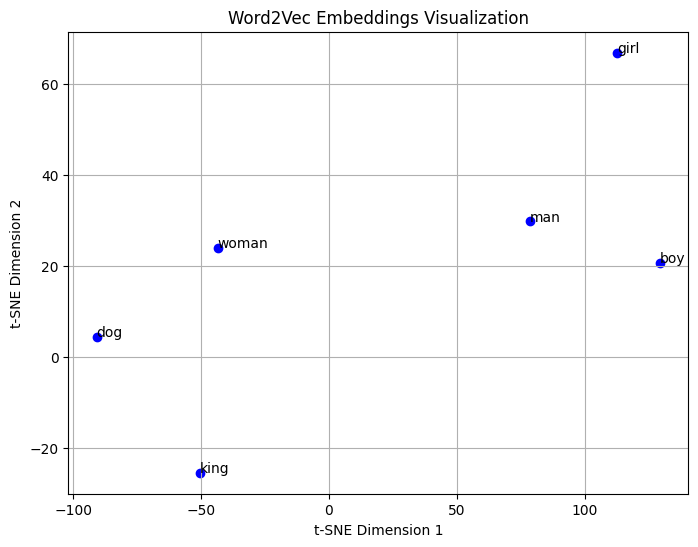

In [113]:
# A more selective model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get word vectors for a subset of words (adjust as needed)
words_of_interest = ["king", "man", "woman", "dog",'boy','girl']
word_vectors = np.array([word2vec_model.wv[word] for word in words_of_interest])

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2,perplexity=3, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker="o", color="b")

# Label the points
for i, word in enumerate(words_of_interest):
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=10)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Word2Vec Embeddings Visualization")
plt.grid(True)
plt.show()
